# スイッチングアトラクタモデルによるデータ生成

- アトラクタのパラメータが確率的に遷移する
- 線形の場合,ただのスイッチングカルマンフィルタじゃねえか
- 正確にはスイッチングARモデルだった
- 漸化式の収束条件ってなんだっけ?

$a_{t+1} \sim N(a_{t},\sigma_{a})$

$b_{t+1} \sim N(b_{t},\sigma_{b})$

$\mu_{t} \sim Beta(exp(a_{t}),exp(b_{t})) $

$ z_{t} \sim 
  \begin{cases}
    z_{t}(0.9) \\
    1-z_{t} (0.1)
  \end{cases}
$




In [285]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0,10.0)

In [286]:
N=2

w1=np.random.normal(size=N)*0.05
w1=w1/np.linalg.norm(w1)
       
w2=np.random.normal(size=N)*0.05
w2=w2/np.linalg.norm(w2)
       
w1=np.array([2,-1])

w2=np.array([1.9,-0.9])

def attractor(x,state):
    
    if np.random.random() <0.01:
        if state == 0:
            state=1
        else:
            state=0

    if state:
        tmp_x= 3*x[0]*(1-x[0])
        
        return np.r_[tmp_x,np.roll(x,1)[1:]],state
    
    else:
        tmp_x=3.4*x[0]*(1-x[0])
        return np.r_[tmp_x,np.roll(x,1)[1:]],state
    

In [287]:
x=np.random.normal(size=N)*0+0.5

s=True
state_list=[]
l=[]
for i in range(1000):
    
    x,state=attractor(x,state)
    state_list.append(state)
    l.append(x)

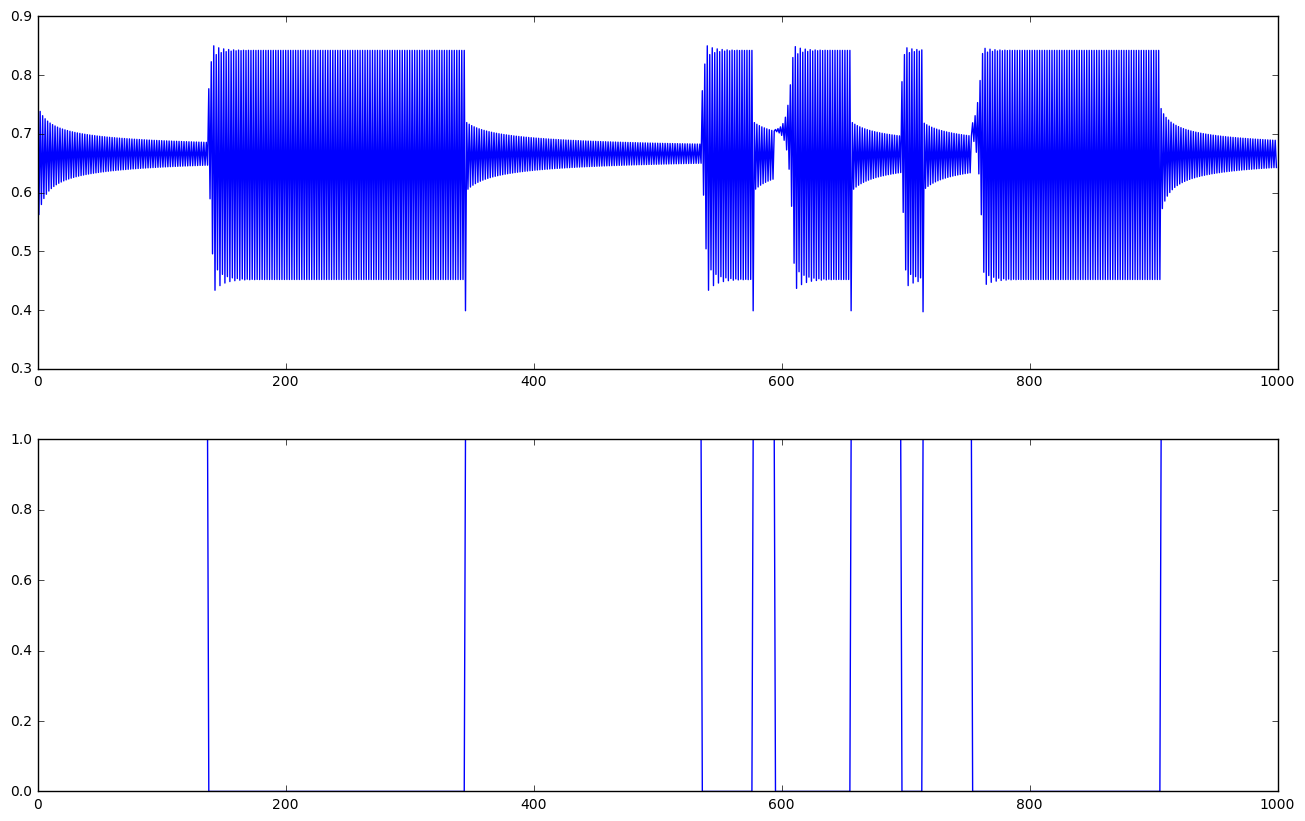

In [290]:
X=np.array(l)
x=X[:,0]
plt.subplot(2,1,1)
plt.plot(x)
plt.subplot(2,1,2)
plt.plot(state_list)